In [3]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def extract_signals(record_name, channel):
    record = wfdb.rdrecord(record_name)
    signal = record.p_signal[:, channel]
    return signal


In [31]:
def downsample_signal(signal, factor):
    return signal[::factor]


In [39]:
def create_downsampled_signals_array(record_names, channel, downsample_factor):
    downsampled_signals = []
    min_length = float('inf')  
    
    for record_name in record_names:
        signal = extract_signals(record_name, channel)
        signal_downsampled = downsample_signal(signal, downsample_factor)
        downsampled_signals.append(signal_downsampled)
        min_length = min(min_length, len(signal_downsampled))  
        
    downsampled_signals = [signal[:min_length] for signal in downsampled_signals]
    
    return np.array(downsampled_signals)


In [149]:
list = ['19140', '19830', '19088', '19090', '19093']
prova = create_downsampled_signals_array(list, 0, 10)


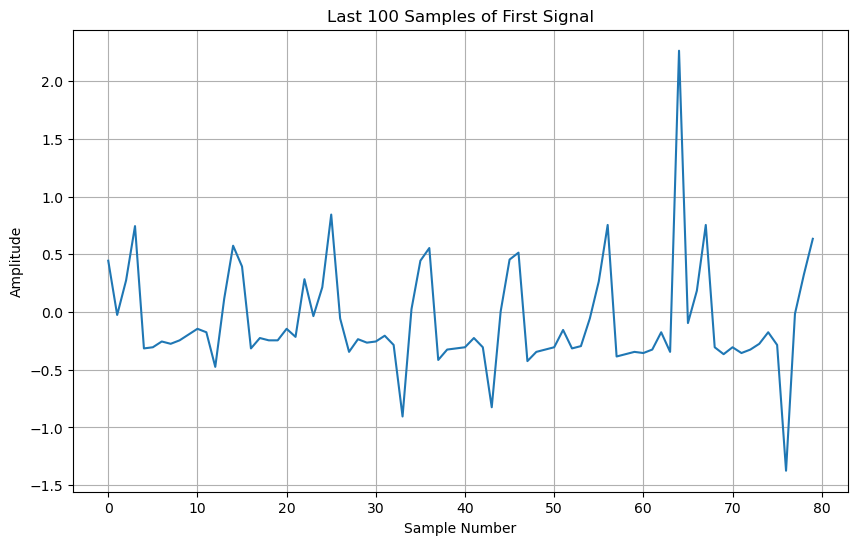

In [219]:
# #now we can plot the signals
# plt.figure(figsize=(10, 6))
# for i, signal in enumerate(prova):
#     plt.subplot(len(prova), 1, i + 1)
#     plt.plot(signal)
#     plt.title(f'Signal {i + 1}')
#     plt.xlabel('Sample Number')
#     plt.ylabel('Amplitude')
# plt.tight_layout()
# plt.show()

#we now plot the last 100 samples of the first signal
plt.figure(figsize=(10, 6))
plt.plot(prova[4][2000:2080])
plt.title('Last 100 Samples of First Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


In [85]:
def sample_random_segments_across_patients(signals, n, sample_length=80, threshold=0.1, max_attempts=10000):
    """
    Randomly samples n segments of length sample_length from a 2D array of signals (patients x datapoints).
    For each sample, a patient is chosen uniformly at random, then a random window from that patient is 
    selected and checked for activity. If the sum of absolute values of the window exceeds the threshold,
    the segment is saved.
    
    Parameters:
        signals (np.ndarray): 2D array with shape (n_patients, number_datapoints_per_patient).
        n (int): Total number of segments to sample.
        sample_length (int): Length of each segment.
        threshold (float): Minimum sum of absolute values for a segment to be considered active.
        max_attempts (int): Maximum number of attempts to find n active segments.
    
    Returns:
        np.ndarray: Array of shape (n, sample_length) containing the sampled segments.
    
    Raises:
        ValueError: If not enough active segments can be found within max_attempts.
    """
    segments = []
    n_patients, total_length = signals.shape
    attempts = 0
    
    while len(segments) < n and attempts < max_attempts:
        attempts += 1
        # Randomly select a patient
        patient_idx = np.random.randint(0, n_patients)
        # Randomly select a starting index ensuring a complete segment can be extracted
        start_index = np.random.randint(0, total_length - sample_length + 1)
        segment = signals[patient_idx, start_index:start_index + sample_length]
        
        # Check if the segment is "active"
        if np.sum(np.abs(segment)) > threshold:
            segments.append(segment)
    
    if len(segments) < n:
        raise ValueError("Not enough active segments found. Consider lowering the threshold or increasing max_attempts.")
    
    return np.array(segments)


In [98]:
sample = sample_random_segments_across_patients(prova, 10, sample_length=80, threshold=20, max_attempts=10000)

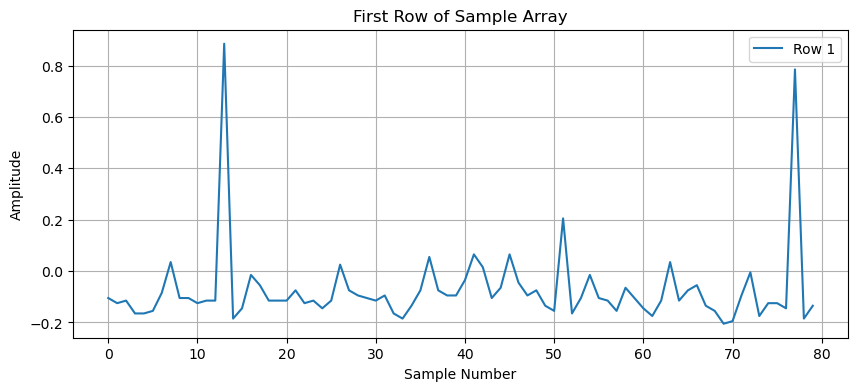

In [214]:
sample = sample_random_segments_across_patients(prova, 10, sample_length=80, threshold=10, max_attempts=10000)
# Plot only the first row of the sample array
plt.figure(figsize=(10, 4))
plt.plot(sample[2], label='Row 1')
plt.title('First Row of Sample Array')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()




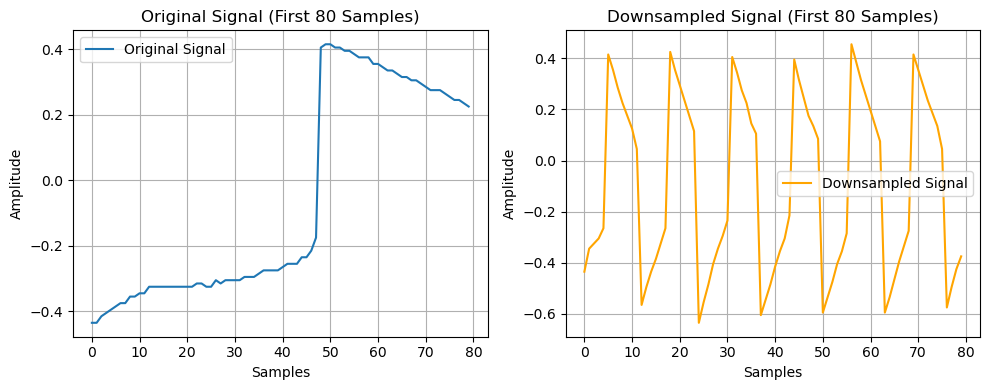

In [36]:
signal = extract_signals('19830', 0)
ds = downsample_signal(signal, 10)

plt.figure(figsize=(10, 4))

# Plot the original signal (first 80 samples)
plt.subplot(1, 2, 1)
plt.plot(signal[:80], label='Original Signal')
plt.title('Original Signal (First 80 Samples)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot the downsampled signal (first 80 samples)
plt.subplot(1, 2, 2)
plt.plot(ds[:80], label='Downsampled Signal', color='orange')
plt.title('Downsampled Signal (First 80 Samples)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


1280


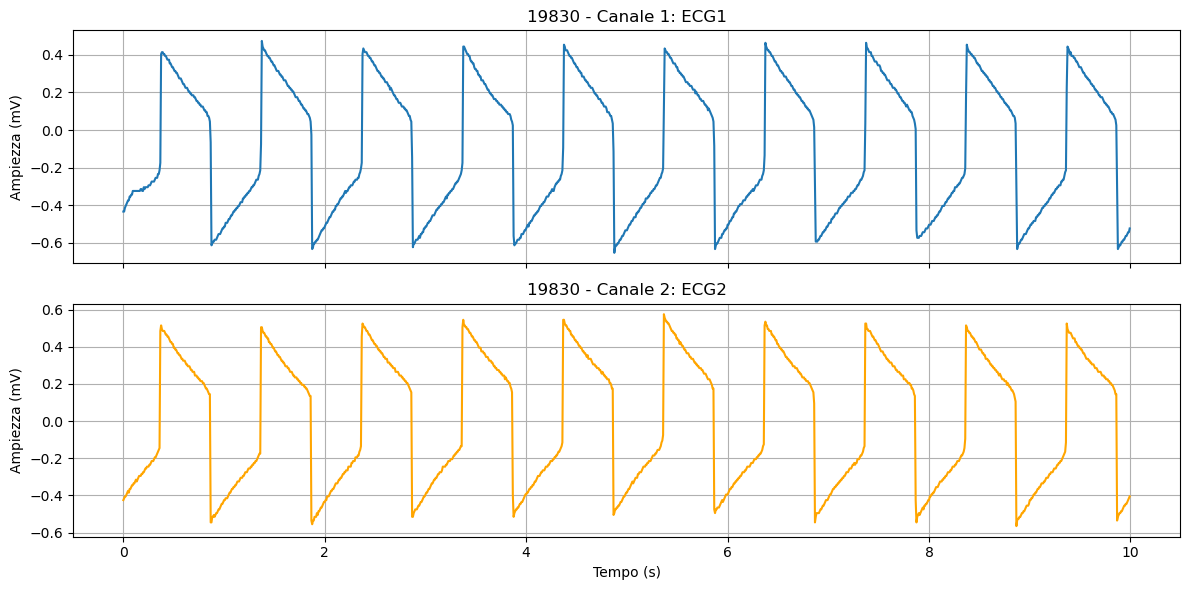

In [18]:
record_name = '19830'
record = wfdb.rdrecord(record_name)
signal = record.p_signal
fs = record.fs
seconds = 10
# seconds = 0.625
samples = int(fs * seconds)
time = np.arange(samples) / fs
print(samples)
# Crea due sottoplot, uno per ogni canale
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)



# Primo canale
axs[0].plot(time, signal[:samples, 0])
axs[0].set_title(f"{record_name} - Canale 1: {record.sig_name[0]}")
axs[0].set_ylabel("Ampiezza (mV)")
axs[0].grid(True)

# Secondo canale
axs[1].plot(time, signal[:samples, 1], color='orange')
axs[1].set_title(f"{record_name} - Canale 2: {record.sig_name[1]}")
axs[1].set_xlabel("Tempo (s)")
axs[1].set_ylabel("Ampiezza (mV)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


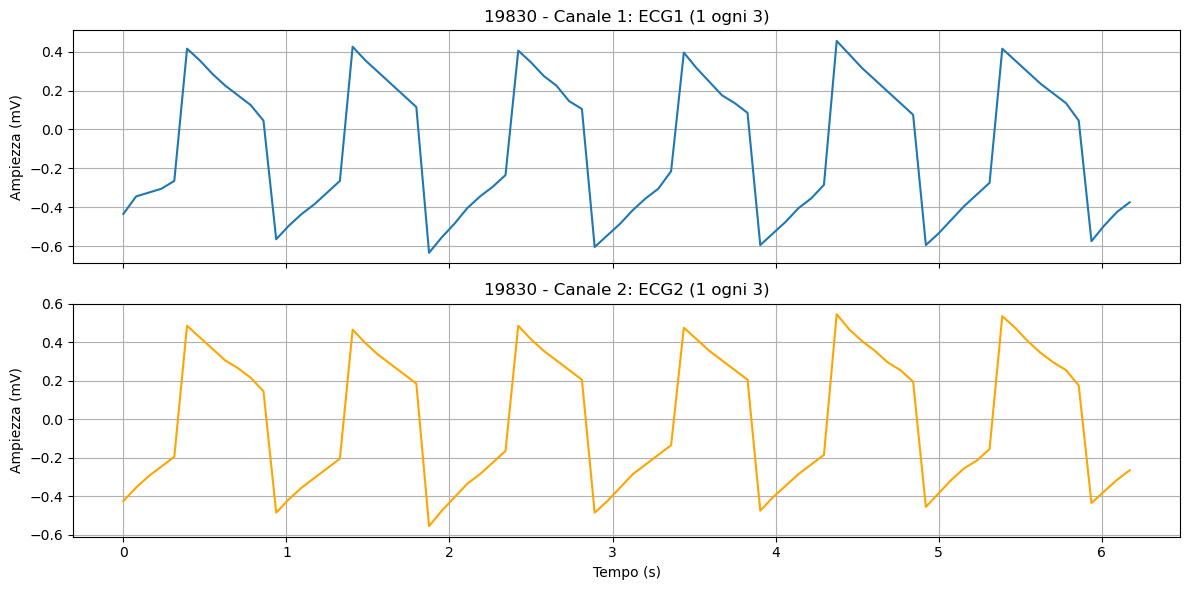

In [25]:
# Downsampling 1 ogni 3
signal_downsampled = signal[:samples, :][::10]         # taglia prima, poi downsampla
time_downsampled = time[:samples][::10]                # anche il tempo tagliato prima

# Secondo canale, downsampled anche lui per coerenza visiva
channel_1_downsampled = signal[:samples, 1][::10]

#we keep the first 80 
signal_downsampled = signal_downsampled[:80]
time_downsampled = time_downsampled[:80]
channel_1_downsampled = channel_1_downsampled[:80]


# Plot
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Primo canale (downsampled)
axs[0].plot(time_downsampled, signal_downsampled[:, 0])
axs[0].set_title(f"{record_name} - Canale 1: {record.sig_name[0]} (1 ogni 3)")
axs[0].set_ylabel("Ampiezza (mV)")
axs[0].grid(True)

# Secondo canale (downsampled anche lui)
axs[1].plot(time_downsampled, channel_1_downsampled, color='orange')
axs[1].set_title(f"{record_name} - Canale 2: {record.sig_name[1]} (1 ogni 3)")
axs[1].set_xlabel("Tempo (s)")
axs[1].set_ylabel("Ampiezza (mV)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [24]:
signal_downsampled.shape

(128, 2)